In [1]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, KFold

In [2]:

# df_TagDesc = pd.read_csv(r'C:\Users\saust\OneDrive\Desktop\GitRepo\Project-OptiC4\CSV\Not for Processing\TagDesc.csv')

# df_All_1 = pd.read_csv(r'C:\Users\saust\OneDrive\Desktop\GitRepo\Project-OptiC4\1 Preprocess\Merge Data\contData_all_Avg_1o2.csv')
# df_All_2 = pd.read_csv(r'C:\Users\saust\OneDrive\Desktop\GitRepo\Project-OptiC4\1 Preprocess\Merge Data\contData_all_Avg_2o2.csv')
# # Concatenate (union) the dataframes
# df_All = pd.concat([df_All_1, df_All_2], ignore_index=True)

df_All = pd.read_csv(r'C:\Users\austinsh\Project-OptiC4\III Models\3 Model C10\3 Feature Selection\filtered-out_5-9_corr.csv')

print(df_All.head())


                  Date  425_pct_Al     Al2O3  M_Value  C4_pct_Eth  C4_pct_H2O  \
0  2012-05-17 09:00:00    6.319560  11.41670  3.50773    2.554580     22.0531   
1  2012-05-17 10:00:00    6.319915  11.40835  3.50797    2.555935     22.0557   
2  2012-05-17 12:00:00    6.320970  11.39165  3.50869    2.560005     22.0636   
3  2012-05-18 08:00:00    6.328690  11.39165  3.51401    2.540370     22.0604   
4  2012-05-18 09:00:00    6.336060  11.40500  3.51910    2.514430     22.0484   

   HydWtr_pct_Ammonia  C4_pct_Hex  HydWtr_Na2O  Decanol  ...   LC55557  \
0            0.867508    0.670721     3.354160  1.03026  ...  66.31395   
1            0.864729    0.671059     3.306475  1.03026  ...  66.31395   
2            0.856391    0.672071     3.163420  1.06326  ...  66.31395   
3            0.811652    0.674174     2.238130  1.51850  ...  65.92560   
4            0.773793    0.675408     1.391475  1.51850  ...  65.92560   

    LC55568    LC90366   LC90368   PI55004   PI55020   TC55552   TC5

### Include

In [3]:
# selected_columns = ['Butanol', 
#                     'FC55569',
#                     'DI55152',
#                     '425 %Al',
#                     'TC55552',
#                     'FC55003',
#                     'LC55555',
#                     'FFC55553',
#                     'FFC55555',
#                     'TC55555',
#                     'TI55021',
#                     'PI55004',
#                     'FC55552'
#                     ]
# existing_columns = [col for col in selected_columns if col in df_All.columns]
# df_All = df_All[existing_columns]

# print(df_All.head())

In [4]:
# Set max columns to display
pd.set_option('display.max_columns', None)

### Exlcude

In [5]:
# List of columns to exclude to run XGboost feature selection
exclude_columns = [  'Date', 
                     'TI40050',
                     'TC55555',
                     'LC55568',
                     'LC55557',
                     'Al2O3',
                     'LC55553',
                     'M_Value',
                     'FFC55553',
                     'DI55580',
                     'Al2O3',
                     'C4_pct_Hex',
                     'LC52572',

            #      'C4_pct_Hex', 'HydWtr_Na2O',
            #       # No improvement after dropping:
            #      'TC55555'
            #    #   MSE Train	RMSE Train	R2 Train	MSE Test	RMSE Test	R2 Test
            #    #   7.935280	2.8169630	0.90869	12.1856	3.490801	   0.8677
                   
                   ]

# Create a new DataFrame without the excluded columnsd
df_All = df_All.drop(columns=exclude_columns)

In [6]:
df_All.columns

Index(['425_pct_Al', 'C4_pct_Eth', 'C4_pct_H2O', 'HydWtr_pct_Ammonia',
       'HydWtr_Na2O', 'Decanol', 'DI55102', 'DI55152', 'FC55003', 'FC55009',
       'FC55552', 'FC55569', 'FC55576', 'FFC55555', 'LC90366', 'LC90368',
       'PI55004', 'PI55020', 'TC55552', 'TI55021'],
      dtype='object')

In [7]:
# df_All = df_All[df_All['Date'] > '2020-06-15 00:00:00']

In [8]:
# df_All.drop('Date', axis=1, inplace=True)

In [9]:
print(df_All.describe())

         425_pct_Al    C4_pct_Eth    C4_pct_H2O  HydWtr_pct_Ammonia  \
count  40127.000000  40127.000000  40127.000000        40127.000000   
mean       6.133716      1.213887     21.178645            0.967938   
std        0.228800      0.691779      2.750323            0.146452   
min        5.270185      0.030786      7.714985            0.374388   
25%        6.003510      0.621701     18.843125            0.877260   
50%        6.135865      1.103350     21.462900            0.939660   
75%        6.265830      1.687807     23.275925            1.028358   
max        7.026215      9.466675     34.151950            1.615295   

        HydWtr_Na2O       Decanol       DI55102       DI55152       FC55003  \
count  40127.000000  40127.000000  40127.000000  40127.000000  40127.000000   
mean       0.789919      3.118667      0.944657      0.932500   5994.093426   
std        0.686560      1.500695      0.051564      0.028840    742.541657   
min        0.002854      0.172500      0.800

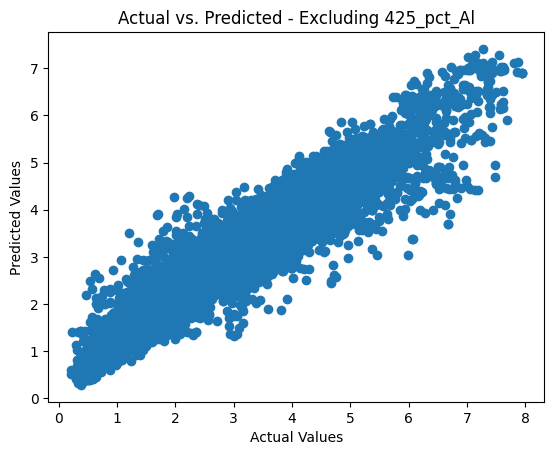

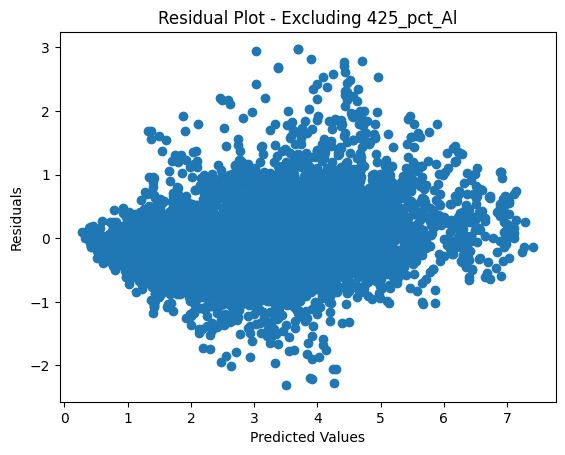

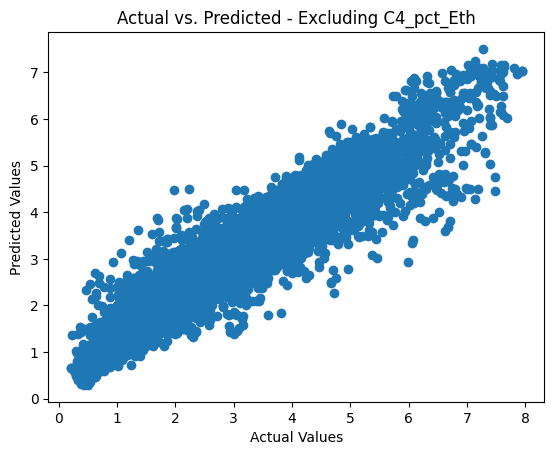

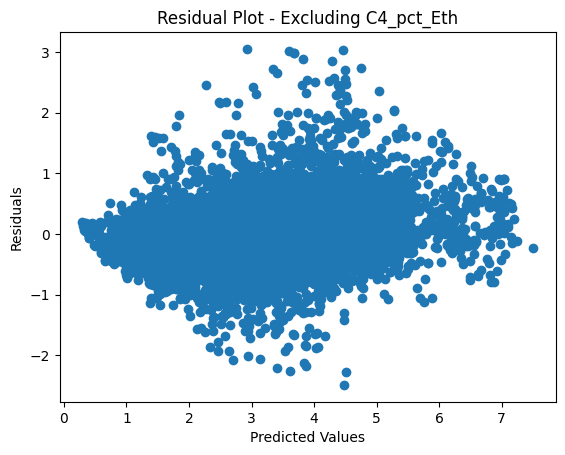

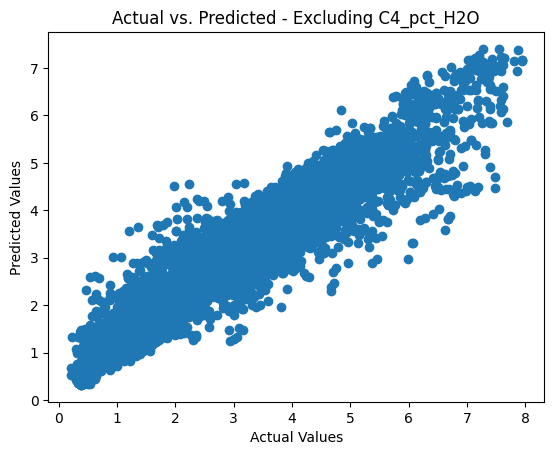

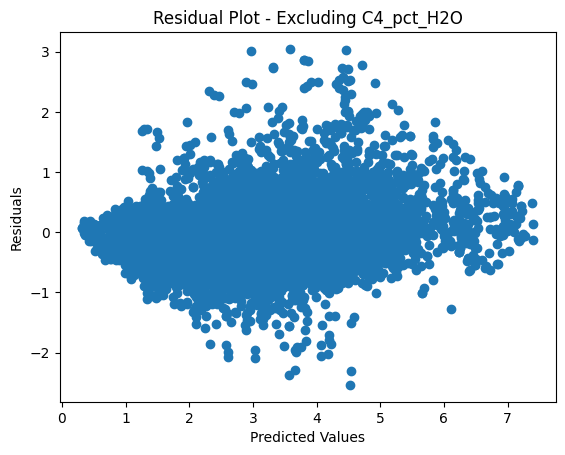

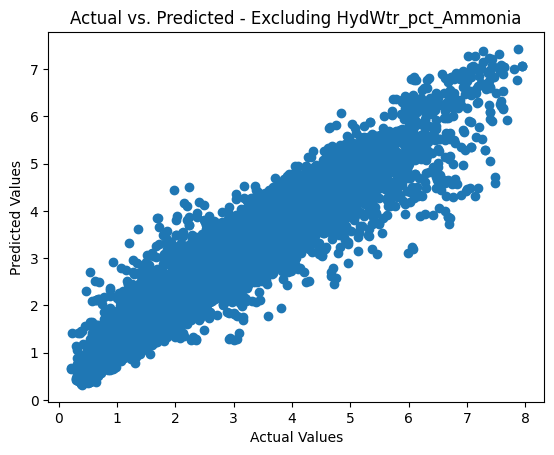

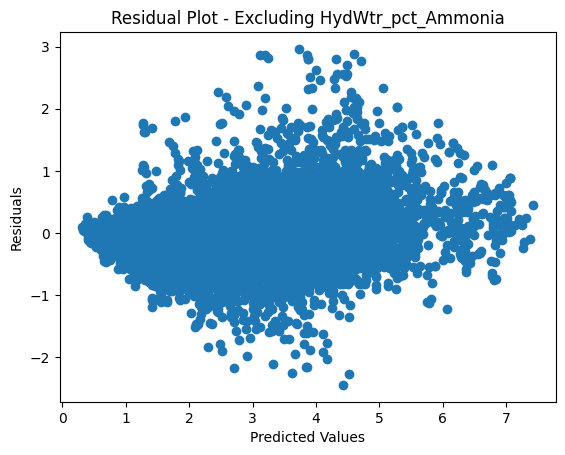

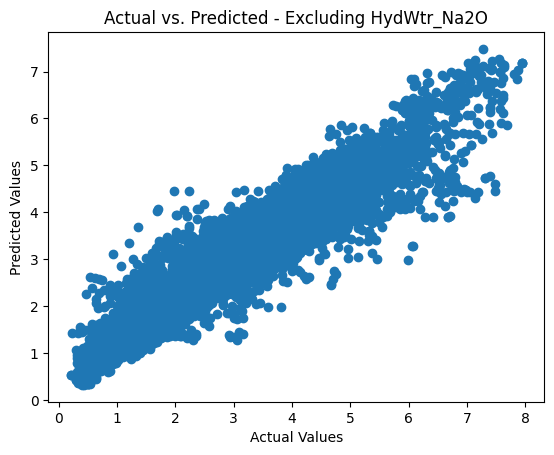

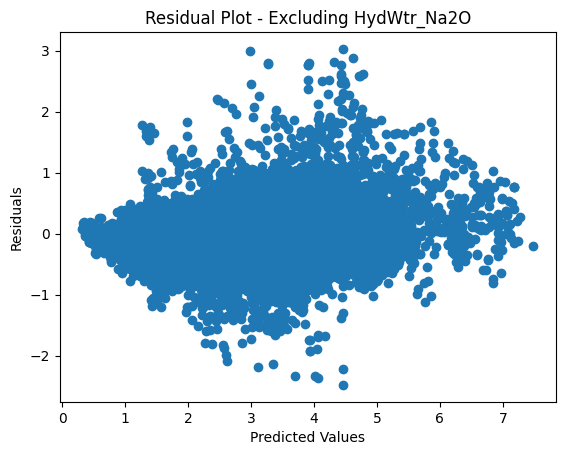

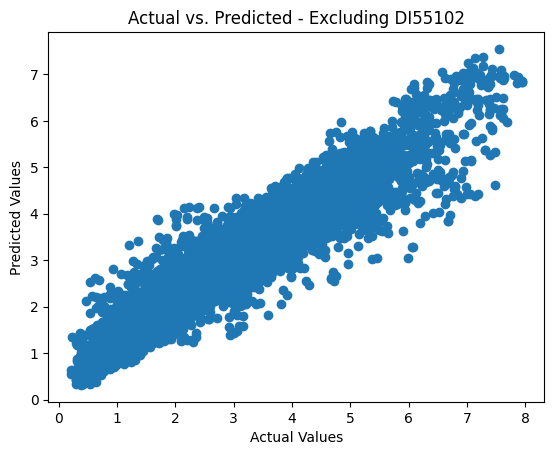

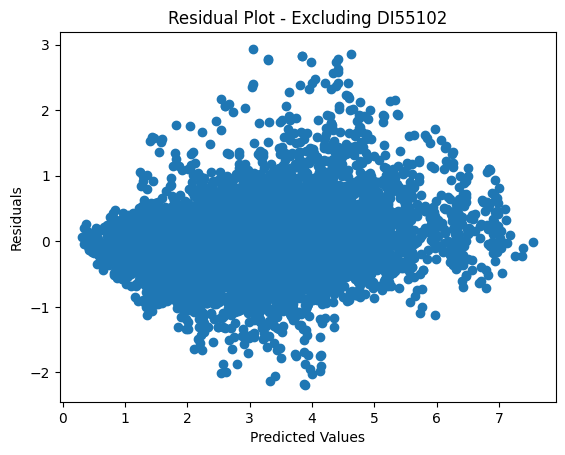

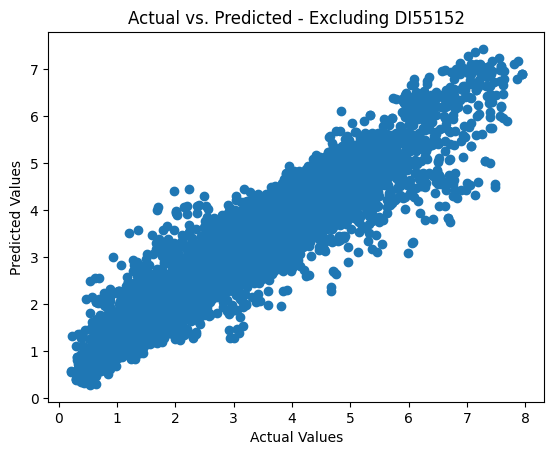

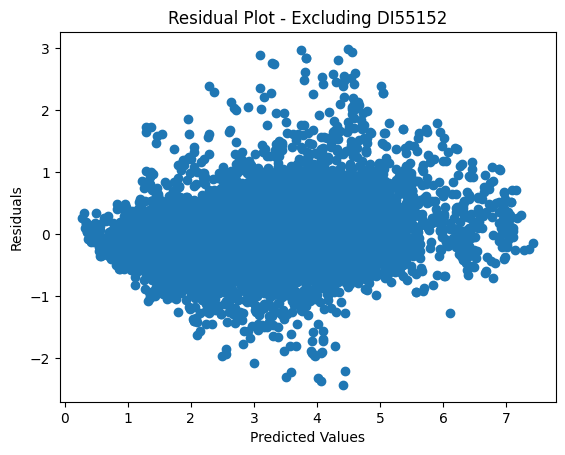

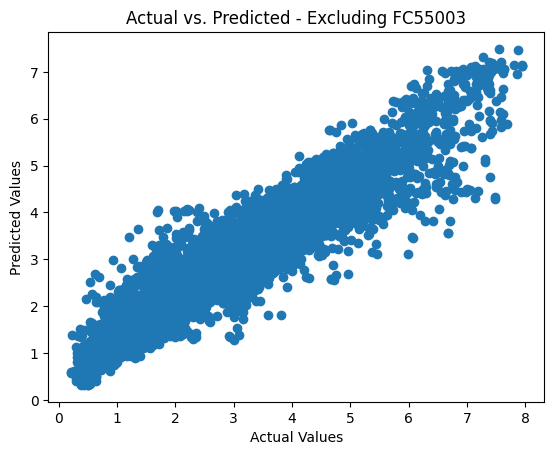

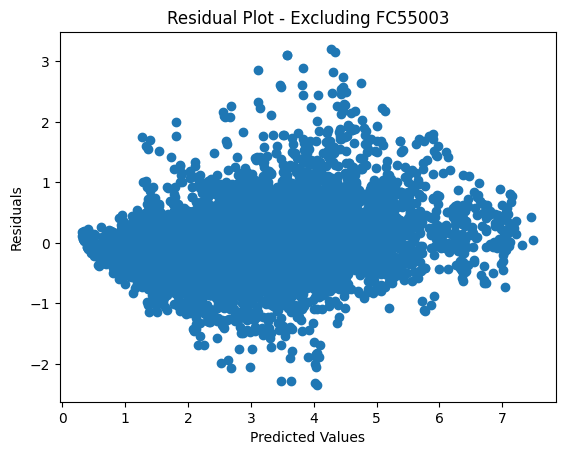

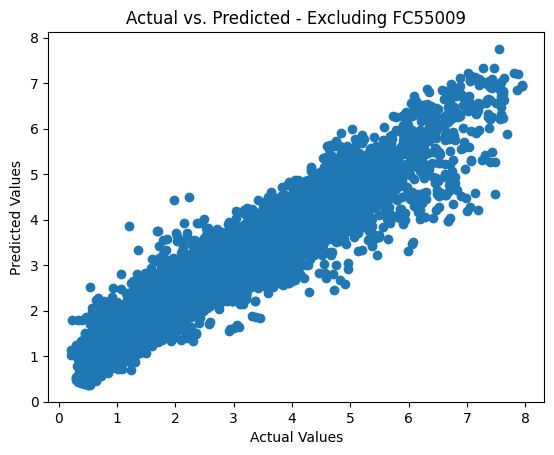

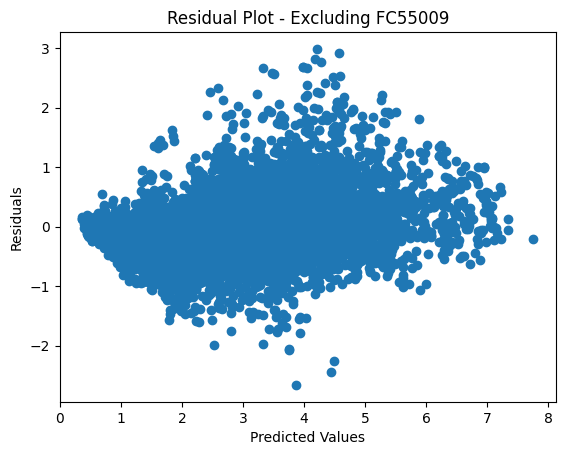

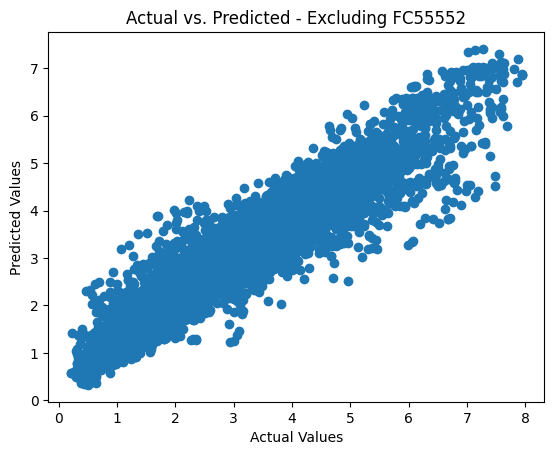

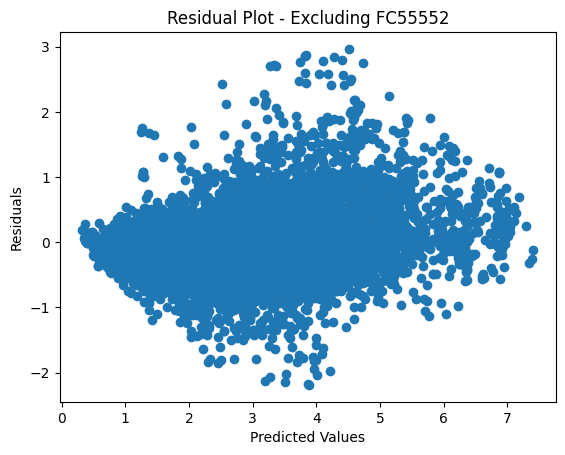

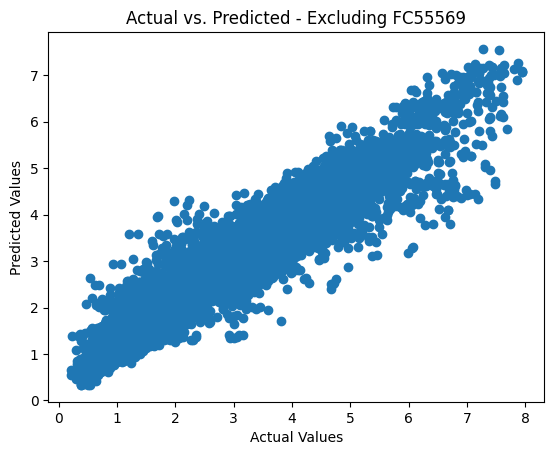

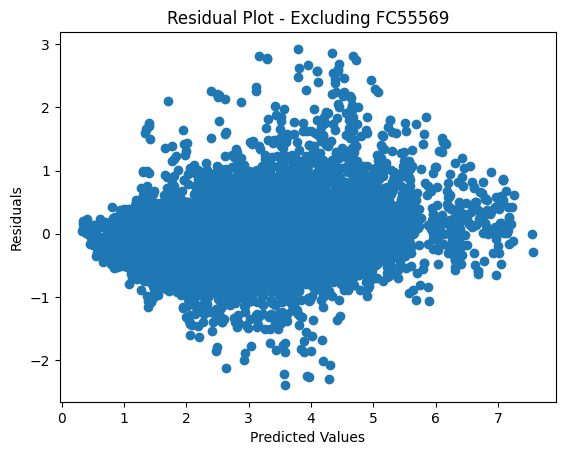

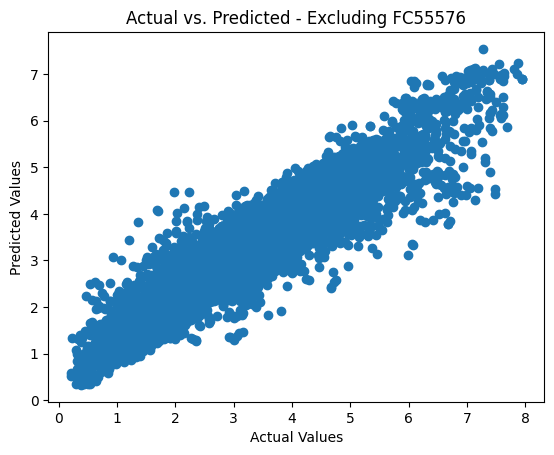

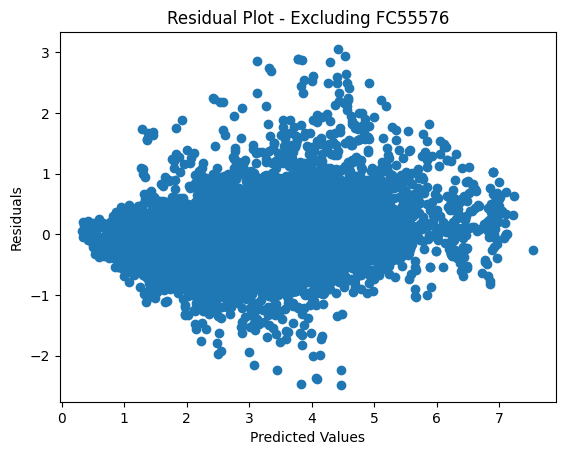

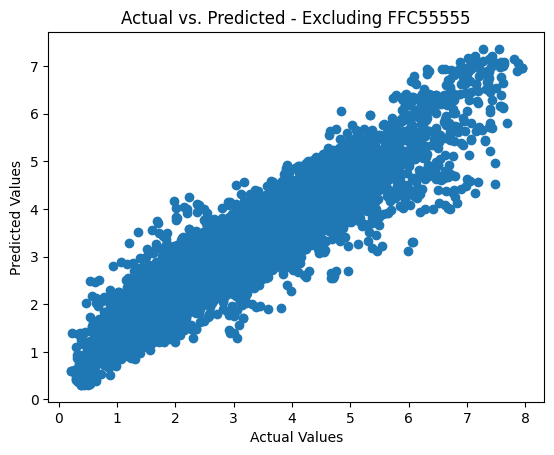

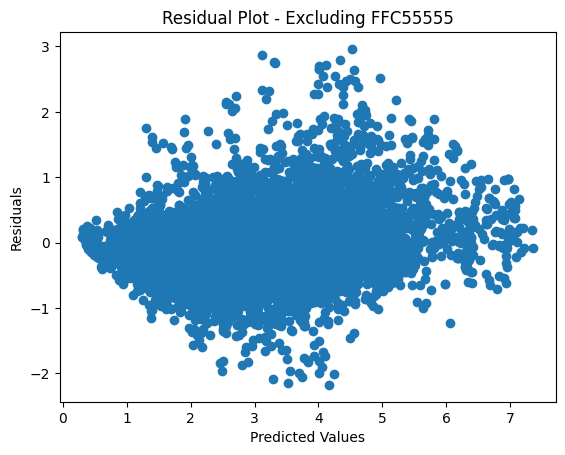

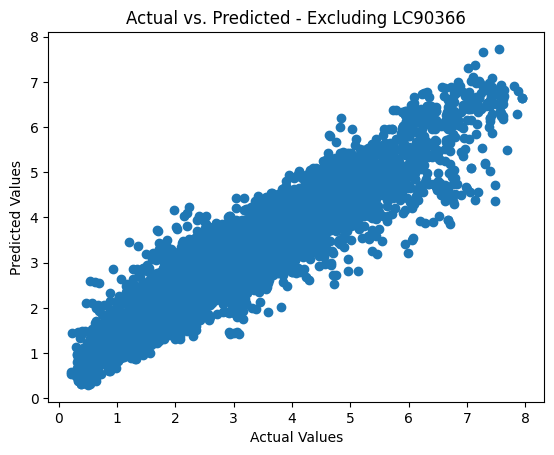

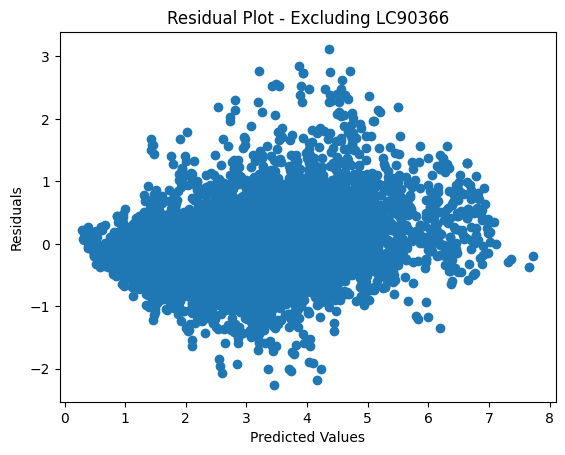

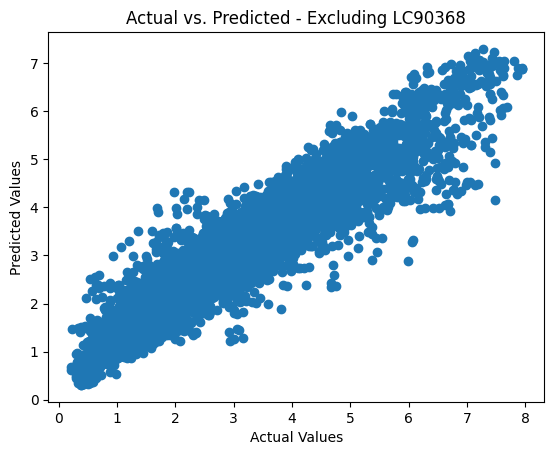

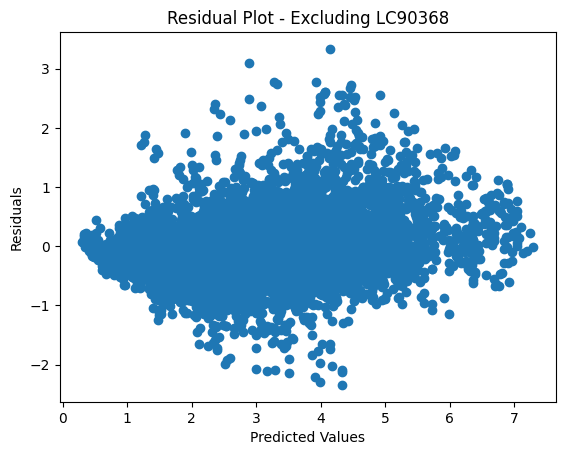

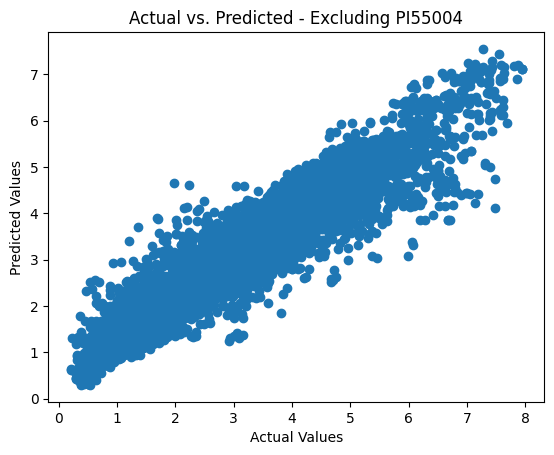

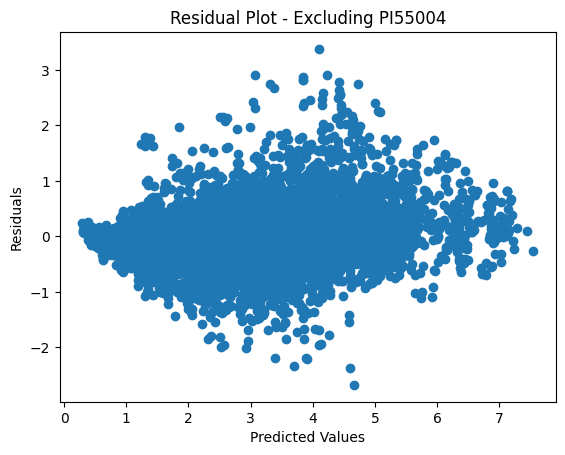

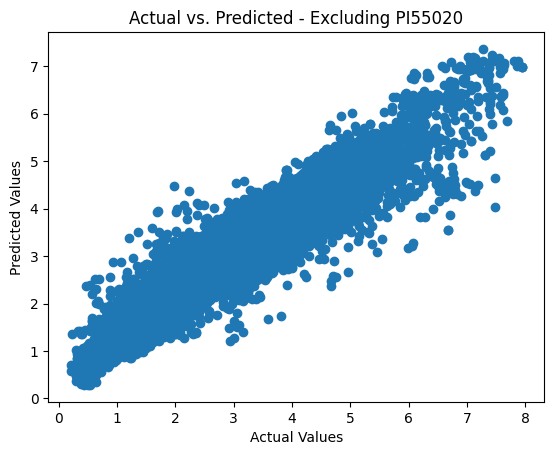

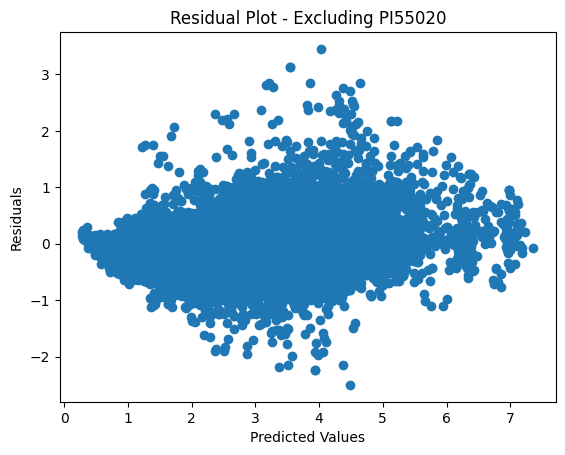

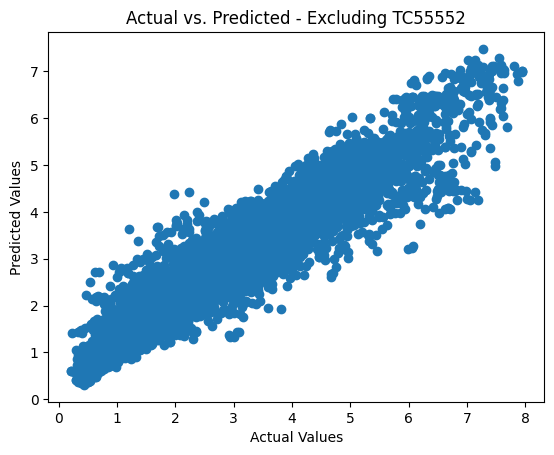

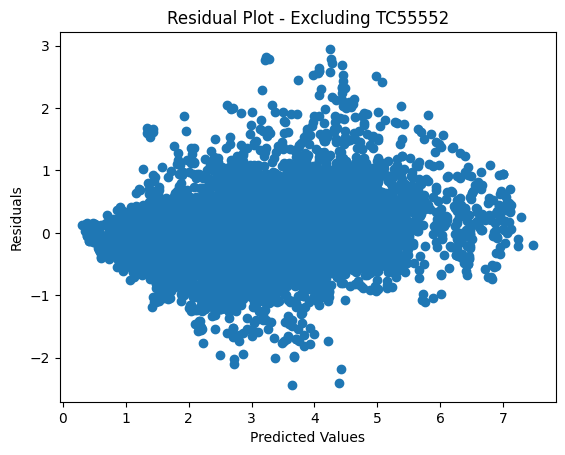

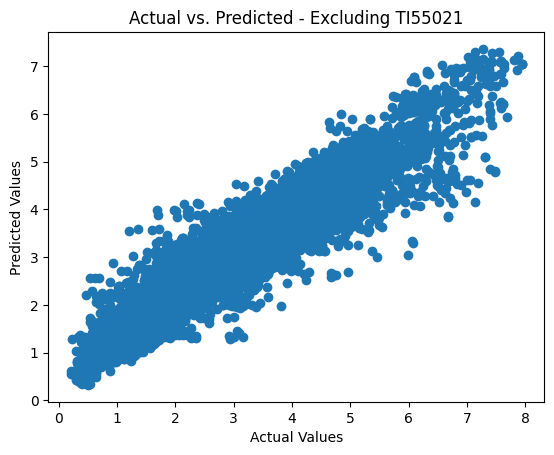

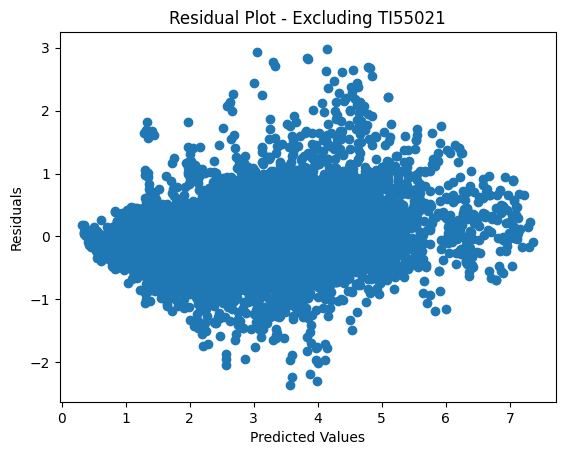

Feature Excluded: 425_pct_Al
MSE Train: 0.22126450207979598
RMSE Train: 0.4703876083399689
R2 Train: 0.9017304916896458
MSE Test: 0.2672758025797492
RMSE Test: 0.5169872363799218
R2 Test: 0.8814063754618222


Feature Excluded: C4_pct_Eth
MSE Train: 0.23090936454958244
RMSE Train: 0.48053029514233797
R2 Train: 0.8974469492157379
MSE Test: 0.2819932794564839
RMSE Test: 0.5310303940985712
R2 Test: 0.8748760464532769


Feature Excluded: C4_pct_H2O
MSE Train: 0.2261396121222206
RMSE Train: 0.4755413884429205
R2 Train: 0.8995653243793686
MSE Test: 0.27685465965735845
RMSE Test: 0.5261698011643755
R2 Test: 0.8771561164828864


Feature Excluded: HydWtr_pct_Ammonia
MSE Train: 0.22493268034311098
RMSE Train: 0.4742706825675724
R2 Train: 0.9001013551994161
MSE Test: 0.2727595574934262
RMSE Test: 0.5222638772626594
R2 Test: 0.8789731646548022


Feature Excluded: HydWtr_Na2O
MSE Train: 0.2280852972635402
RMSE Train: 0.4775827648309141
R2 Train: 0.898701193349009
MSE Test: 0.2773826530692171
RMSE Te

In [10]:

def feature_iteration_model(df, target_column_name, plot_results=False):
    original_features = df.drop(target_column_name, axis=1).columns
    model_performance = {}

    for feature in original_features:
        X = df.drop([target_column_name, feature], axis=1)
        y = df[target_column_name]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        xgb_model = xgb.XGBRegressor(
            objective ='reg:squarederror', 
            learning_rate=0.03,
            n_estimators=600,
            max_depth=7,
            subsample=0.9,
            colsample_bytree=0.8,
            gamma=2.0,
            alpha=0.2,
            reg_lambda=2,
            colsample_bylevel=0.8,
            colsample_bynode=0.7
        )
        xgb_model.fit(X_train, y_train)

        # Predict and evaluate on training data
        y_train_pred = xgb_model.predict(X_train)
        mse_train = mean_squared_error(y_train, y_train_pred)
        rmse_train = np.sqrt(mse_train)
        r2_train = r2_score(y_train, y_train_pred)

        # Predict and evaluate on test data
        y_pred = xgb_model.predict(X_test)
        mse_test = mean_squared_error(y_test, y_pred)
        rmse_test = np.sqrt(mse_test)
        r2_test = r2_score(y_test, y_pred)

        # Store the metrics
        model_performance[feature] = {
            'MSE Train': mse_train,
            'RMSE Train': rmse_train,
            'R2 Train': r2_train,
            'MSE Test': mse_test,
            'RMSE Test': rmse_test,
            'R2 Test': r2_test
        }

        # Plotting (optional)
        if plot_results:
            plt.scatter(y_test, y_pred)
            plt.xlabel('Actual Values')
            plt.ylabel('Predicted Values')
            plt.title(f'Actual vs. Predicted - Excluding {feature}')
            plt.show()

            residuals = y_test - y_pred
            plt.scatter(y_pred, residuals)
            plt.xlabel('Predicted Values')
            plt.ylabel('Residuals')
            plt.title(f'Residual Plot - Excluding {feature}')
            plt.show()

    return model_performance

# Assuming your data is in df_All and you want to predict 'Butanol'
performance_without_each_feature = feature_iteration_model(df_All, 'Decanol', plot_results=True)

# Print or analyze the performance dictionary
for feature, metrics in performance_without_each_feature.items():
    print(f"Feature Excluded: {feature}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print("\n")


In [11]:
# Assuming performance_without_each_feature is your model_performance dictionary
performance_df = pd.DataFrame.from_dict(performance_without_each_feature, orient='index')

print(performance_df) 

                    MSE Train  RMSE Train  R2 Train  MSE Test  RMSE Test  \
425_pct_Al           0.221265    0.470388  0.901730  0.267276   0.516987   
C4_pct_Eth           0.230909    0.480530  0.897447  0.281993   0.531030   
C4_pct_H2O           0.226140    0.475541  0.899565  0.276855   0.526170   
HydWtr_pct_Ammonia   0.224933    0.474271  0.900101  0.272760   0.522264   
HydWtr_Na2O          0.228085    0.477583  0.898701  0.277383   0.526671   
DI55102              0.220175    0.469228  0.902214  0.269895   0.519514   
DI55152              0.225090    0.474436  0.900032  0.275419   0.524804   
FC55003              0.223080    0.472314  0.900924  0.271137   0.520708   
FC55009              0.220523    0.469599  0.902060  0.271599   0.521152   
FC55552              0.221764    0.470918  0.901509  0.269312   0.518953   
FC55569              0.222595    0.471800  0.901139  0.270566   0.520159   
FC55576              0.222589    0.471794  0.901142  0.271905   0.521446   
FFC55555    

In [12]:
performance_df.to_csv('feature_test.csv', index=True)